In [8]:
import talos as ta

In [9]:
r = ta.Reporting('./hasil/7layer.csv')

In [10]:
# get the number of rounds in the Scan
r.rounds()

671

In [11]:
# get the highest result ('val_acc' by default)
r.high()

0.832460965

In [12]:
# get the highest result for any metric
r.high('acc')

0.999087106

In [13]:
# get the round with the best result
r.rounds2high('val_acc')

268

In [14]:
# get the best paramaters
r.best_params('val_acc')

array([['<function elu at 0x00000154C3F60C80>', 30, 30, 0, 0.0001,
        "<class 'keras.optimizers.Adam'>", 50, 50, 'normal', 32, 20, 100,
        0],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x7fdbc087d898>',
        30, 30, 0, 0.01, "<class 'keras.optimizers.Adam'>", 50, 60,
        'normal', 256, 20, 80, 1],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x7fdbc087d898>',
        30, 30, 0, 0.01, "<class 'keras.optimizers.Adam'>", 50, 60,
        'glorot_normal', 256, 20, 80, 2],
       ["<class 'keras.layers.advanced_activations.PReLU'>", 30, 40, 0,
        0.01, "<class 'keras.optimizers.Adam'>", 50, 60, 'normal', 32,
        15, 100, 3],
       ["<class 'keras.layers.advanced_activations.PReLU'>", 30, 40, 0,
        0.01, "<class 'keras.optimizers.Adam'>", 50, 50, 'lecun_normal',
        64, 15, 75, 4],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x7fdbc087d898>',
        30, 30, 0, 0.001, "<class 'keras.optimizers.Ada

In [15]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron    -0.022502
second_neuron   -0.022547
third_neuron    -0.036038
fourth_neuron   -0.053973
batch_size      -0.025900
epochs                NaN
epochs2               NaN
dropout               NaN
lr               0.873537
Name: loss, dtype: float64

In [16]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron     0.024010
second_neuron    0.015272
third_neuron     0.024038
fourth_neuron    0.058933
batch_size       0.043453
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.910166
Name: acc, dtype: float64

In [17]:
# get correlation for hyperparameters against a metric
r.correlate('val_acc')

first_neuron     0.028201
second_neuron    0.019272
third_neuron     0.022808
fourth_neuron    0.052542
batch_size       0.052501
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.936919
Name: val_acc, dtype: float64

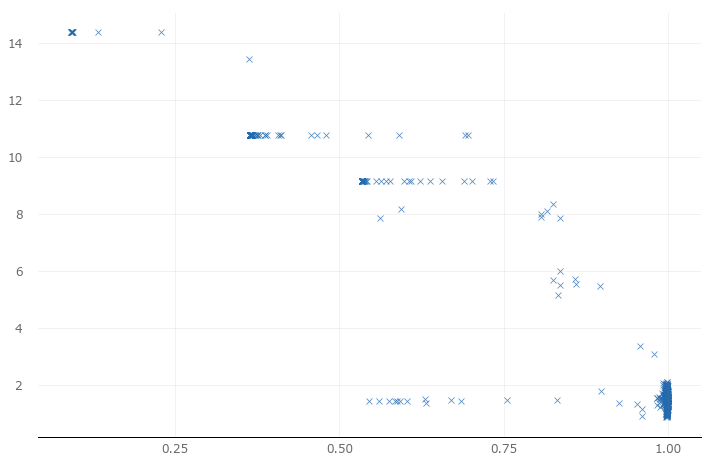

In [18]:
# a regression plot for two dimensions 
r.plot_regs('acc')

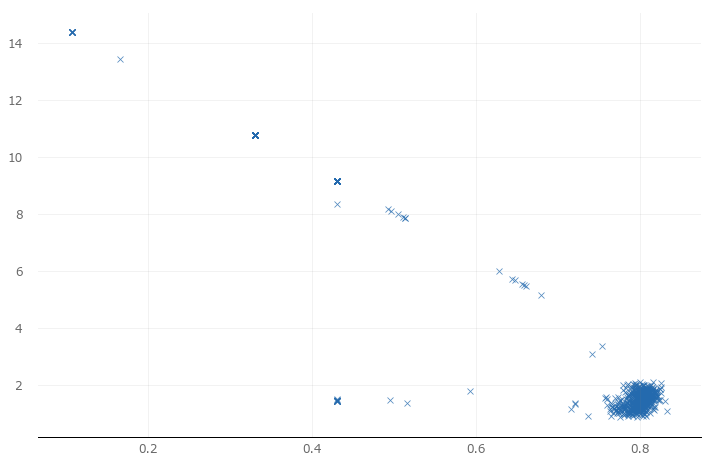

In [19]:
# a regression plot for two dimensions 
r.plot_regs('val_acc')

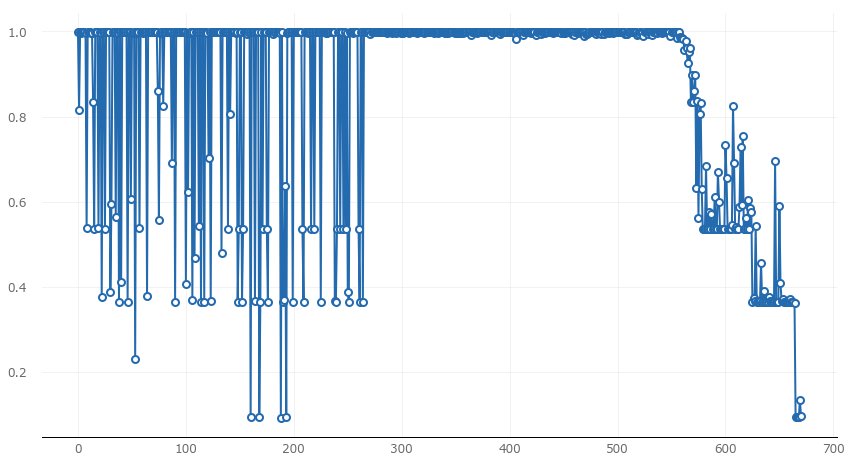

In [20]:
# line plot
r.plot_line('acc')

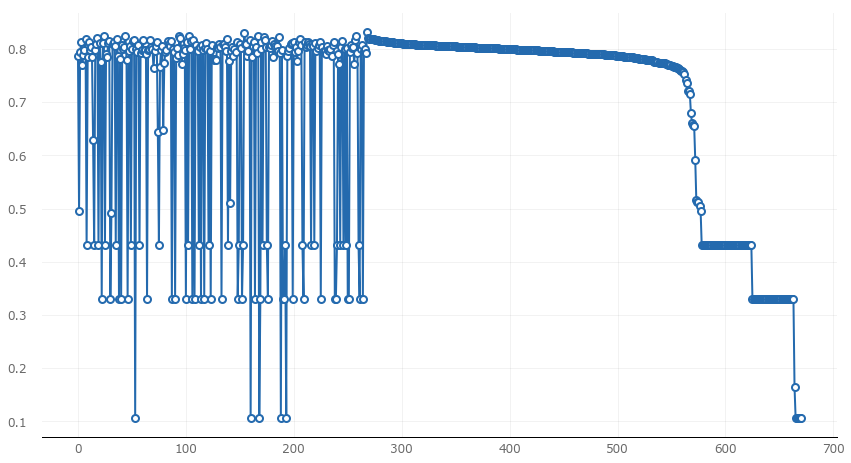

In [21]:
# line plot
r.plot_line('val_acc')

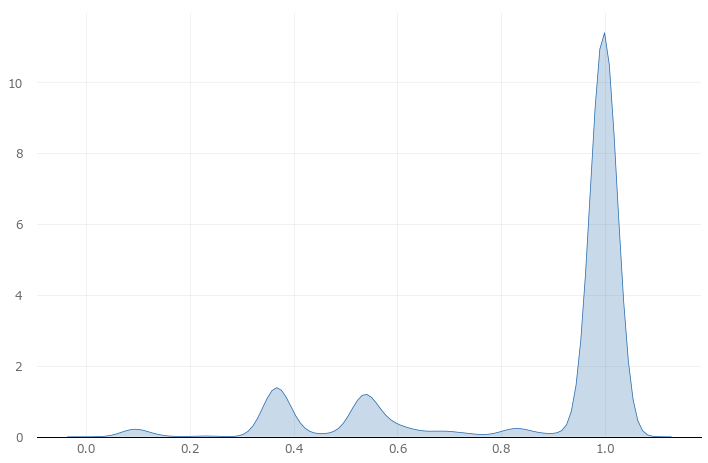

In [22]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

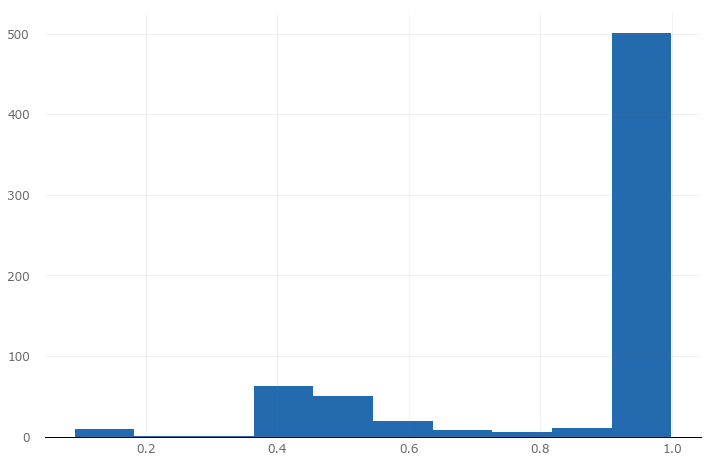

In [23]:

# a simple histogram
r.plot_hist('acc')

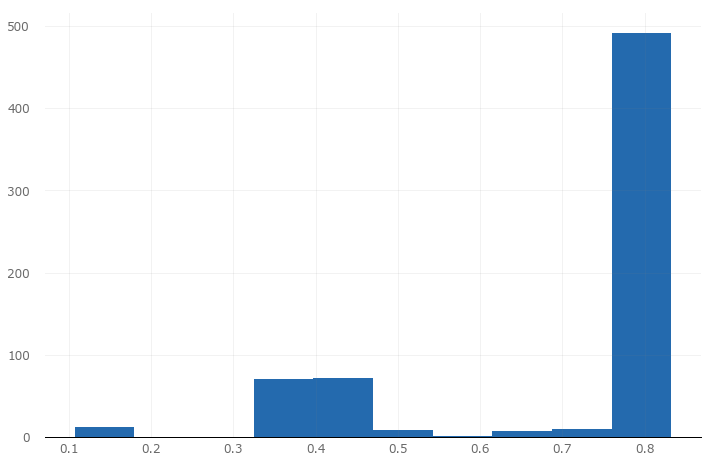

In [24]:

# a simple histogram
r.plot_hist('val_acc')

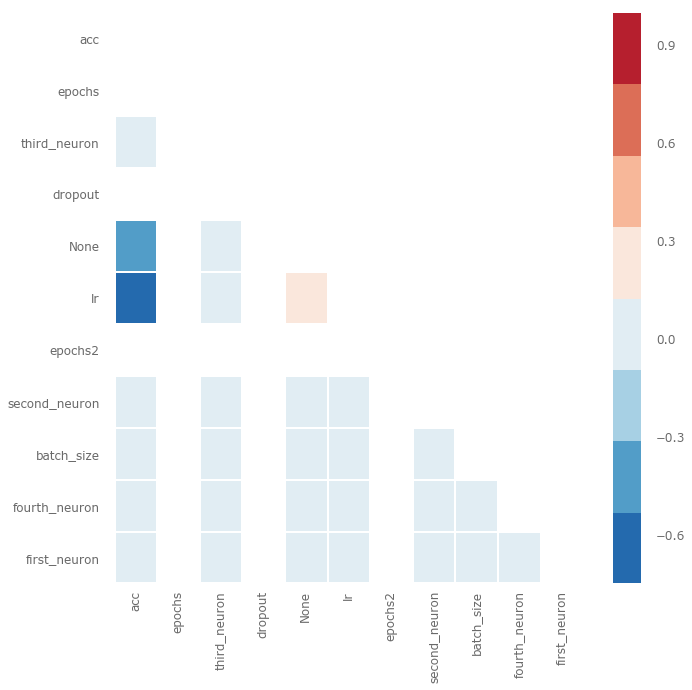

In [25]:
# heatmap correlation
r.plot_corr('acc')

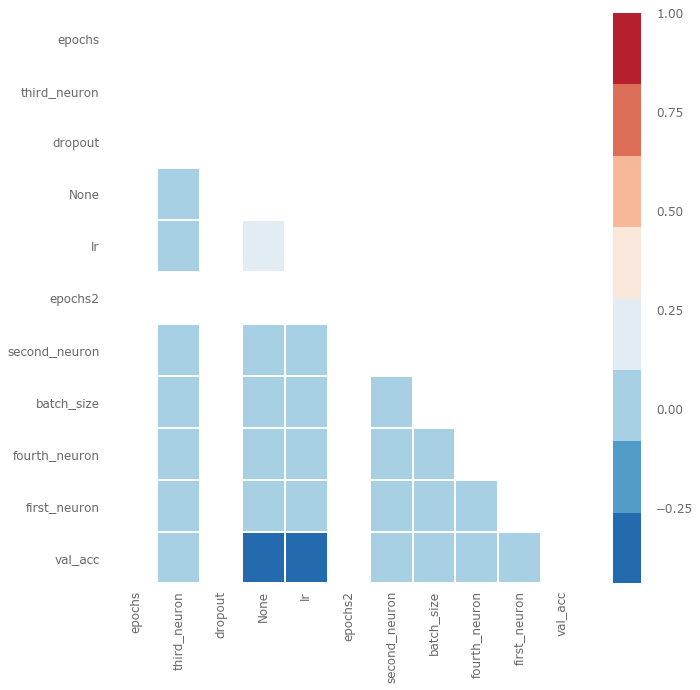

In [26]:
# heatmap correlation
r.plot_corr('val_acc')

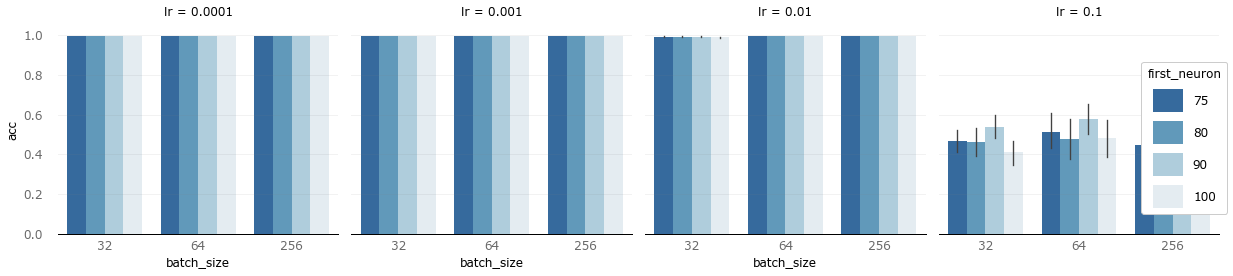

In [27]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


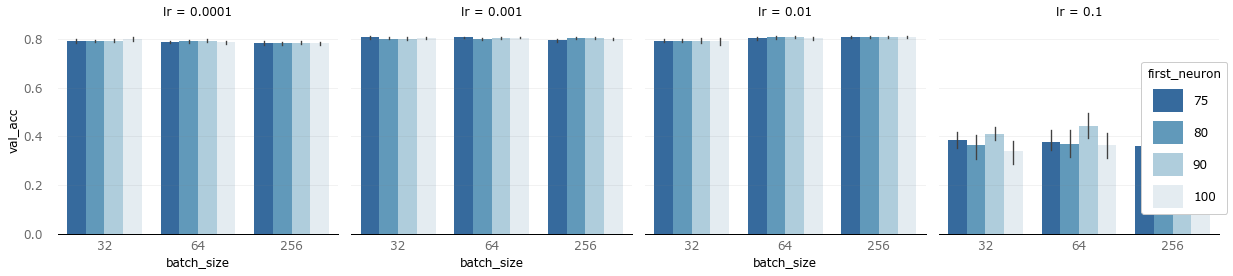

In [28]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'first_neuron', 'lr')

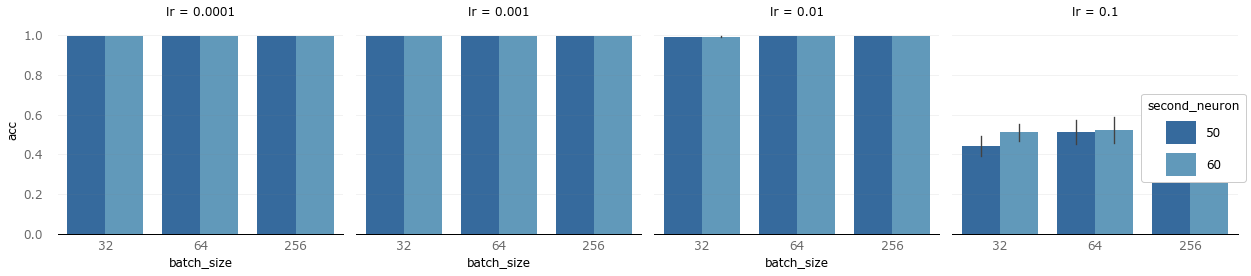

In [29]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'second_neuron', 'lr')


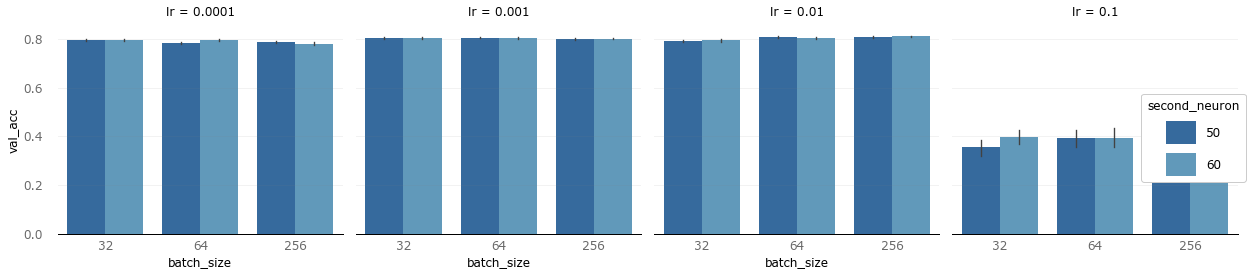

In [30]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'second_neuron', 'lr')

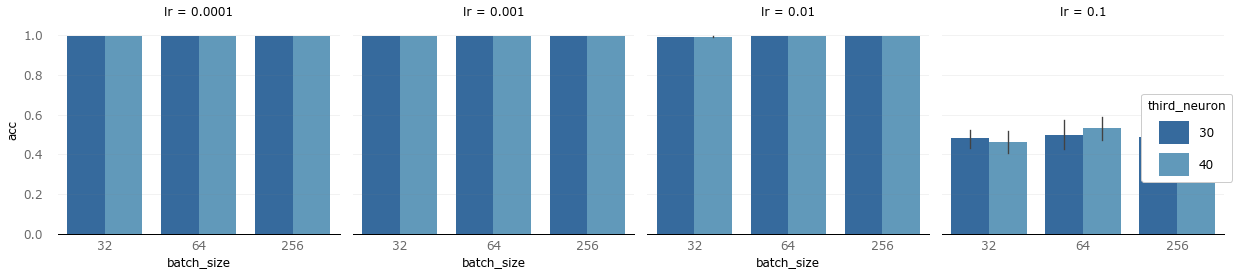

In [31]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'third_neuron', 'lr')


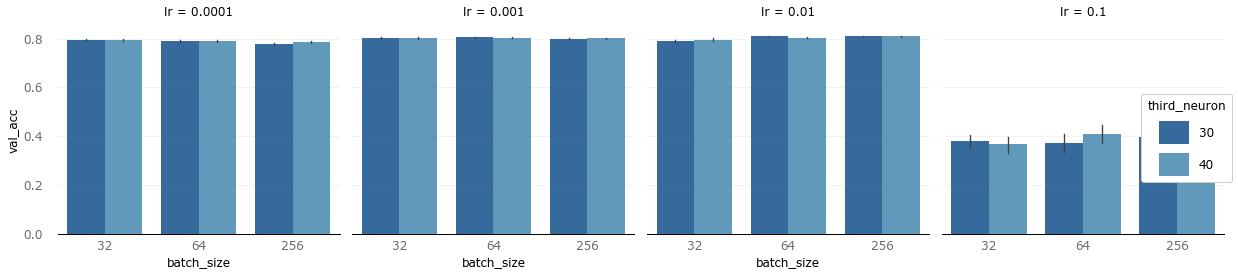

In [34]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'third_neuron', 'lr')

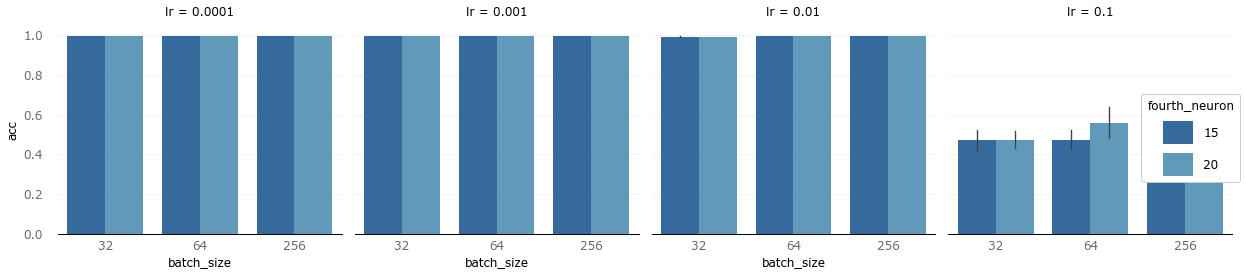

In [35]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'fourth_neuron', 'lr')


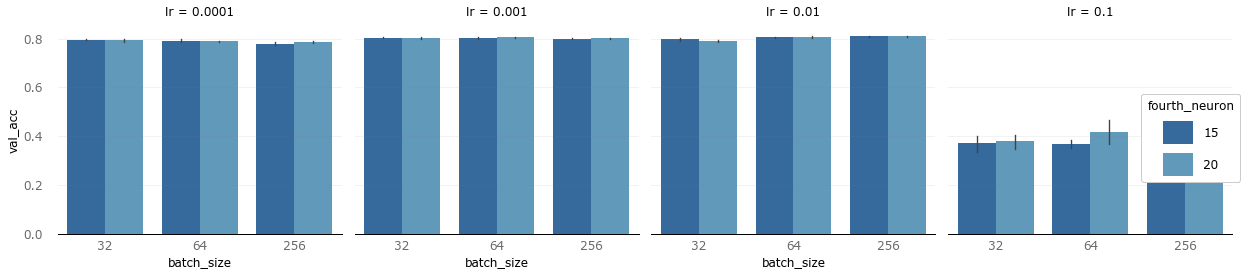

In [36]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'fourth_neuron', 'lr')

# Matrik Confusion

### Open Data

In [37]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [38]:
my_file = '../data_NSL/data.npy'
train, test, test2, y_train, y_test, y_test2 = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [39]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [40]:
# load model
filepath='./hasil/best7elu.hdf5'
dnn=load_model(filepath)
dnn.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 122)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12300     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 105       
Total params: 19,605
T

In [41]:
##loading dnn untuk data 
# load weights

dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,y_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Created model and loaded weights from file
125973/125973 [==============================] - 16s 124us/step
loss 0.008018350239650968
acc 0.9976820429774634
acc: 99.77%


In [42]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_train, axis=1)

In [43]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
from sklearn.metrics import classification_report
outcomes = ['Normal','DoS','Probe' ,'R2L', 'U2R']
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))
#print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

      Normal    0.99819   0.99768   0.99794     67343
         DoS    0.99974   0.99996   0.99985     45927
       Probe    0.99545   0.99528   0.99537     11656
         R2L    0.90682   0.94874   0.92731       995
         U2R    0.75000   0.46154   0.57143        52

    accuracy                        0.99768    125973
   macro avg    0.93004   0.88064   0.89838    125973
weighted avg    0.99768   0.99768   0.99766    125973



In [45]:
plt.rcParams.update(plt.rcParamsDefault)

Confusion matrix, without normalization
[[67187    11    51    89     5]
 [    2 45925     0     0     0]
 [   53     1 11601     1     0]
 [   46     0     2   944     3]
 [   21     0     0     7    24]]


<Figure size 640x480 with 0 Axes>

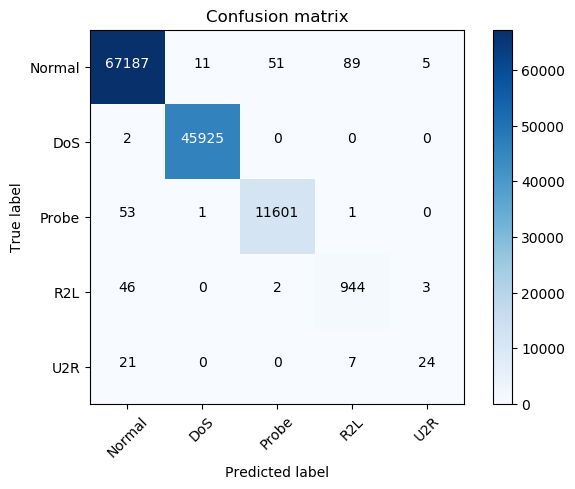

In [46]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes

results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.clf()
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [47]:
#Data Test
result_test = dnn.evaluate(test,y_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

22544/22544 [==============================] - 3s 126us/step
loss 1.9706894510721087
acc 0.8324609652235628
acc: 83.25%


In [48]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

      Normal    0.75501   0.96983   0.84904      9711
         DoS    0.96384   0.85412   0.90567      7458
       Probe    0.81692   0.82569   0.82128      2421
         R2L    0.97477   0.35076   0.51589      2754
         U2R    0.60870   0.07000   0.12556       200

    accuracy                        0.83246     22544
   macro avg    0.82385   0.61408   0.64349     22544
weighted avg    0.85629   0.83246   0.81768     22544

Confusion matrix, without normalization
[[9418   72  212    4    5]
 [ 868 6370  210   10    0]
 [ 258  164 1999    0    0]
 [1774    0   10  966    4]
 [ 156    3   16   11   14]]


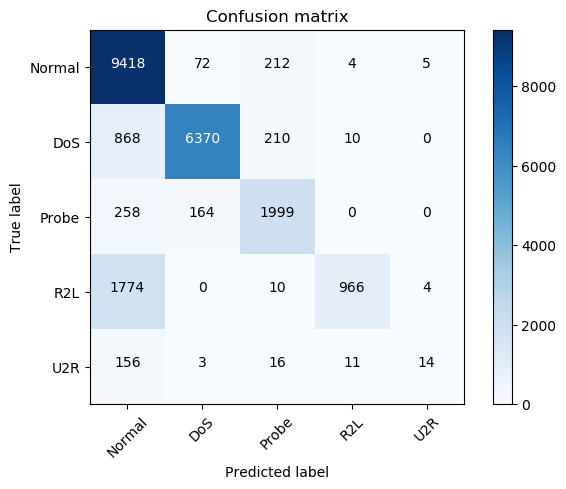

In [49]:
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))


results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))